In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pingouin as pg
import scipy.stats as st
import statsmodels.api as sm
%matplotlib inline

In [2]:
constructor = pd.read_csv('constructors.csv')

In [3]:
constructor.drop(['url','Unnamed: 5' ],axis=1, inplace=True)

In [4]:
constructor_result = pd.read_csv('constructorResults.csv')

In [5]:
constructor_result.drop(['status','constructorResultsId'],axis=1, inplace=True)

In [6]:
constructor_merged = pd.merge(constructor, constructor_result, how='inner', left_on='constructorId', right_on='constructorId')

In [7]:
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')

In [8]:
races.drop(['url'], inplace=True, axis=1)

In [9]:
races.columns=['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'start_time']

In [10]:
results_races_merged = pd.merge(results, races, how='inner', right_on = 'raceId', left_on='raceId')

In [11]:
drivers = pd.read_csv('drivers.csv',encoding='latin')

In [12]:
drivers.drop(['url','number'], inplace=True, axis=1)

In [13]:
driver_standing = pd.read_csv('driverStandings.csv')

In [14]:
driver_standing.drop(['driverStandingsId'], axis=1, inplace=True)

In [15]:
driver_standing_merged = pd.merge(driver_standing, drivers, how='inner', left_on='driverId', right_on='driverId')

In [16]:
driver_standing_merged.drop(['positionText'], inplace=True, axis=1)

In [17]:
cons_stand = pd.read_csv('constructorStandings.csv')

In [18]:
cons_stand.drop(['constructorStandingsId',  'Unnamed: 7'],axis=1, inplace=True)

In [19]:
status = pd.read_csv('status.csv')

In [20]:
results_merged = pd.merge(results_races_merged, status, how='left', left_on='statusId', right_on='statusId')

In [21]:
results_merged.shape

(23777, 25)

In [22]:
driver_standing_merged.shape

(31726, 11)

In [23]:
constructor_merged.shape

(11142, 6)

In [24]:
cons_stand.shape

(11896, 6)

In [25]:
results_merged['number'].isnull().sum()

6

In [26]:
results_merged.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name',
       'date', 'start_time', 'status'],
      dtype='object')

In [27]:
results_merged.drop(['positionText', 'position', 'start_time',  'circuitId', 'number', 'grid', 'resultId','date', 'rank','fastestLap','fastestLapTime' ,'time'], axis=1, inplace=True)

In [28]:
results_merged.columns

Index(['raceId', 'driverId', 'constructorId', 'positionOrder', 'points',
       'laps', 'milliseconds', 'fastestLapSpeed', 'statusId', 'year', 'round',
       'name', 'status'],
      dtype='object')

In [29]:
results_merged.sort_values(by=['year'], inplace=True)

In [30]:
results_merged.reset_index(drop=True, inplace=True)

In [31]:
results_merged[results_merged['fastestLapSpeed']=='01:42.6']

,raceId,driverId,constructorId,positionOrder,points,laps,milliseconds,fastestLapSpeed,statusId,year,round,name,status
23513,988,839,10,8,4.0,55,5752973.0,01:42.6,1,2017,20,Abu Dhabi Grand Prix,Finished


In [32]:
results_merged.drop([23513], inplace=True)

In [33]:
results_merged['fastestLapSpeed']=results_merged['fastestLapSpeed'].astype('float32')

In [34]:
results_merged['fastestLapSpeed'].describe()

count    5382.000000
mean      200.745117
std        21.293182
min        89.540001
25%       190.634995
50%       202.447510
75%       213.839996
max       257.320007
Name: fastestLapSpeed, dtype: float64

In [35]:
results_merged.isna().sum()

raceId                 0
driverId               0
constructorId          0
positionOrder          0
points                 0
laps                   0
milliseconds       17774
fastestLapSpeed    18394
statusId               0
year                   0
round                  0
name                   0
status                 0
dtype: int64

In [36]:
temp_df1 = results_merged[results_merged['fastestLapSpeed'].notna()]

In [37]:
temp_df1

,raceId,driverId,constructorId,positionOrder,points,laps,milliseconds,fastestLapSpeed,statusId,year,round,name,status
18106,96,30,6,1,10.0,60,5555101.0,207.143997,1,2004,7,European Grand Prix,Finished
18108,95,21,15,19,0.0,2,NaN,148.804001,4,2004,6,Monaco Grand Prix,Collision
18109,95,45,17,15,0.0,12,NaN,151.406998,7,2004,6,Monaco Grand Prix,Transmission
18110,95,11,16,17,0.0,2,NaN,147.772995,5,2004,6,Monaco Grand Prix,Engine
18111,95,17,19,16,0.0,11,NaN,155.216003,6,2004,6,Monaco Grand Prix,Gearbox
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23772,975,807,4,8,4.0,70,5645528.0,206.203995,1,2017,7,Canadian Grand Prix,Finished
23773,975,8,6,7,6.0,70,5643786.0,208.250000,1,2017,7,Canadian Grand Prix,Finished
23774,975,839,10,6,8.0,70,5625870.0,205.904007,1,2017,7,Canadian Grand Prix,Finished
23775,975,4,1,16,0.0,66,NaN,206.973999,131,2017,7,Canadian Grand Prix,Power Unit


In [38]:
temp_df1.set_index(['name', 'year'], inplace=True)


In [39]:
temp_df1_sort = temp_df1.sort_index()

In [40]:
temp_df1_sort.loc[('Monaco Grand Prix',2004),:]

raceId  driverId  constructorId  positionOrder  \
name              year                                                   
Monaco Grand Prix 2004      95        21             15             19   
                  2004      95        45             17             15   
                  2004      95        11             16             17   
                  2004      95        17             19             16   
                  2004      95        14              1             18   
                  2004      95        46             18             14   
                  2004      95         8              1             13   
                  2004      95        30              6             11   
                  2004      95         4              4             12   
                  2004      95        15              4              1   
                  2004      95        22              6              3   
                  2004      95        31              3              4   
                  2004      95        13             15              5   
                  2004      95        43              7              6   
                  2004      95         2             17              7   
                  2004      95        44              7              8   
                  2004      95        47             18              9   
                  2004      95        23              3             10   
                  2004      95        18             16              2   

                        points  laps  milliseconds  fastestLapSpeed  statusId  \
name              year                                                          
Monaco Grand Prix 2004     0.0     2           NaN       148.804001         4   
                  2004     0.0    12           NaN       151.406998         7   
                  2004     0.0     2           NaN       147.772995         5   
                  2004     0.0    11           NaN       155.216003         6   
                  2004     0.0     2           NaN       149.255005         4   
                  2004     0.0    15           NaN       147.367004         6   
                  2004     0.0    27           NaN       157.789001        63   
                  2004     0.0    45           NaN       161.528000         4   
                  2004     0.0    41           NaN       159.837997         3   
                  2004    10.0    77     6346601.0       160.598007         1   
                  2004     6.0    77     6422367.0       158.705002         1   
                  2004     5.0    76           NaN       159.479996        11   
                  2004     4.0    76           NaN       155.850006        11   
                  2004     3.0    76           NaN       157.729004        11   
                  2004     2.0    75           NaN       153.636993        12   
                  2004     1.0    74           NaN       157.188004        13   
                  2004     0.0    71           NaN       146.837997        16   
                  2004     0.0    69           NaN       154.972000         6   
                  2004     8.0    77     6347098.0       159.850998         1   

                        round        status  
name              year                       
Monaco Grand Prix 2004      6     Collision  
                  2004      6  Transmission  
                  2004      6        Engine  
                  2004      6       Gearbox  
                  2004      6     Collision  
                  2004      6       Gearbox  
                  2004      6    Pneumatics  
                  2004      6     Collision  
                  2004      6      Accident  
                  2004      6      Finished  
                  2004      6      Finished  
                  2004      6        +1 Lap  
                  2004      6        +1 Lap  
                  2004      6        +1 Lap  
                  2004      6  

In [41]:
temp_df1_sort.loc[('Monaco Grand Prix',2004),:]['fastestLapSpeed'].max()

161.5279998779297

In [42]:
first=[]

In [43]:
for i in temp_df1_sort.index:
    first.append(i)

In [44]:
first = sorted(list(set(first)))

In [45]:
len(first)

262

In [46]:
my_dict = dict()

In [47]:
for i in first:
    #print(temp_df1_sort.loc[i,:]['fastestLapSpeed'].max())
    my_dict[i] = temp_df1_sort.loc[i,:]['fastestLapSpeed'].max()

In [48]:
a,b = [], []
for k,v in my_dict.items():
    a.append(k)
    b.append(v)

In [49]:
df_ =pd.DataFrame({'name':a, 'speed':b})

In [50]:
gp=[]
for i in first:
    gp.append(i[0])
gp = sorted(list(set(gp)))

In [51]:
df_[['GP_name', 'year']] = pd.DataFrame(df_['name'].values.tolist(), index=df_.index)

In [52]:
df_.drop('name', inplace=True, axis=1)

In [53]:
df_ = df_[['GP_name', 'year', 'speed']]

In [54]:
df_.set_index(['GP_name'], inplace=True)

In [55]:
df_

,year,speed
GP_name,,
Abu Dhabi Grand Prix,2009,199.386993
Abu Dhabi Grand Prix,2010,197.427994
Abu Dhabi Grand Prix,2011,194.854004
Abu Dhabi Grand Prix,2012,192.320007
Abu Dhabi Grand Prix,2013,193.304993
...,...,...
United States Grand Prix,2013,198.753998
United States Grand Prix,2014,195.768005
United States Grand Prix,2015,197.154007


In [56]:
df_['Race']=df_.index

Text(0.5, 0.98, 'Fastest Lap in each Grand Prix (2004-2017)')

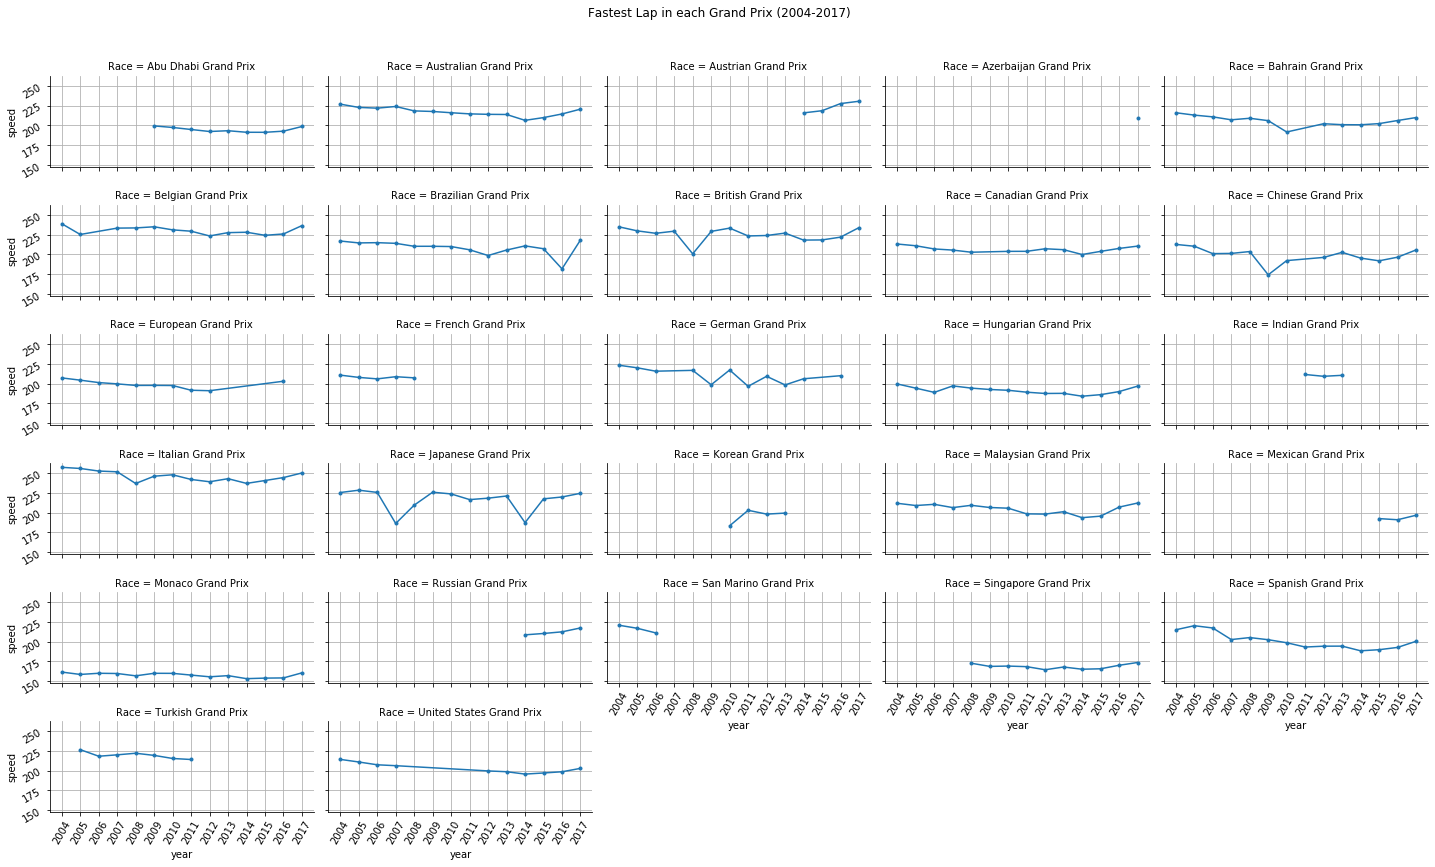

In [57]:
g = sns.FacetGrid(df_, col='Race',col_wrap=5, height=2,aspect=2)
g = g.map(plt.plot,'year', "speed",marker=".").set(xticks=list(sorted(df_['year'].unique())), yticks=[150, 175, 200, 225, 250])
#g.set(xticks=df_['year'])
#plt.grid(b=True, which='major', color='#666666', linestyle='-')
for ax in g.axes.flat:
    for label in ax.get_yticklabels():
        label.set_rotation(30)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(60)
for ax in g.axes.flat:
    ax.grid(b=True, which='major')
    ax.grid(b=True, which='minor')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Fastest Lap in each Grand Prix (2004-2017)')
#plt.savefig('lapspeed.png', bbox_inches='tight')

In [58]:
results_merged.head()


,raceId,driverId,constructorId,positionOrder,points,laps,milliseconds,fastestLapSpeed,statusId,year,round,name,status
0,835,559,113,10,0.0,135,NaN,NaN,13,1950,3,Indianapolis 500,+3 Laps
1,835,796,158,22,0.0,123,NaN,NaN,112,1950,3,Indianapolis 500,+15 Laps
2,835,659,113,21,0.0,125,NaN,NaN,53,1950,3,Indianapolis 500,+13 Laps
3,835,677,105,20,0.0,126,NaN,NaN,55,1950,3,Indianapolis 500,+12 Laps
4,835,771,113,19,0.0,127,NaN,NaN,45,1950,3,Indianapolis 500,+11 Laps


In [59]:
driver_standing_merged.head()


,raceId,driverId,points,position,wins,driverRef,code,forename,surname,dob,nationality
0,18,1,10.0,1,1,hamilton,HAM,Lewis,Hamilton,07/01/1985,British
1,19,1,14.0,1,1,hamilton,HAM,Lewis,Hamilton,07/01/1985,British
2,20,1,14.0,3,1,hamilton,HAM,Lewis,Hamilton,07/01/1985,British
3,21,1,20.0,2,1,hamilton,HAM,Lewis,Hamilton,07/01/1985,British
4,22,1,28.0,3,1,hamilton,HAM,Lewis,Hamilton,07/01/1985,British


In [60]:
constructor_merged.head()


,constructorId,constructorRef,name,nationality,raceId,points
0,1,mclaren,McLaren,British,18,14.0
1,1,mclaren,McLaren,British,19,10.0
2,1,mclaren,McLaren,British,20,4.0
3,1,mclaren,McLaren,British,21,6.0
4,1,mclaren,McLaren,British,22,8.0


In [61]:
cons_stand.head()

,raceId,constructorId,points,position,positionText,wins
0,18,1,14.0,1,1,1
1,18,2,8.0,3,3,0
2,18,3,9.0,2,2,0
3,18,4,5.0,4,4,0
4,18,5,2.0,5,5,0


In [62]:
cons_stand.sort_values(by=['raceId', 'position'], inplace=True)

In [63]:
cons_stand

,raceId,constructorId,points,position,positionText,wins
3674,1,23,18.0,1,1,1
3673,1,7,11.0,2,2,0
3672,1,4,4.0,3,3,0
3671,1,3,3.0,4,4,0
3670,1,5,3.0,5,5,0
...,...,...,...,...,...,...
11892,988,4,57.0,6,6,0
11891,988,5,53.0,7,7,0
11895,988,210,47.0,8,8,0
11894,988,1,30.0,9,9,0


In [64]:
temp_df2 = constructor_merged.drop(['points', 'raceId'], axis=1)

In [65]:
temp_df2 = temp_df2.drop_duplicates(keep='first')

In [66]:
temp_df2

,constructorId,constructorRef,name,nationality
0,1,mclaren,McLaren,British
780,2,bmw_sauber,BMW Sauber,German
851,3,williams,Williams,British
1546,4,renault,Renault,French
1890,5,toro_rosso,Toro Rosso,Italian
...,...,...,...,...
10870,206,marussia,Marussia,Russian
10929,207,caterham,Caterham,Malaysian
10985,208,lotus_f1,Lotus F1,British
11062,209,manor,Manor Marussia,British


In [67]:
temp_df2 = pd.merge(results_merged, temp_df2, how='inner', left_on='constructorId', right_on='constructorId')

In [68]:
temp_df2.sort_values(by=['raceId', 'positionOrder'], inplace=True)

In [69]:
temp_l = list(temp_df2.columns)
temp_l[11] = 'race_name'
temp_l[14] = 'constructor_name'

In [70]:
temp_df2.columns=temp_l

In [71]:
temp_df2.reset_index(drop=True, inplace=True)

In [72]:
temp_df2

,raceId,driverId,constructorId,positionOrder,points,laps,milliseconds,fastestLapSpeed,statusId,year,round,race_name,status,constructorRef,constructor_name,nationality
0,1,18,23,1,10.0,58,5655784.0,216.891006,1,2009,1,Australian Grand Prix,Finished,brawn,Brawn,British
1,1,22,23,2,8.0,58,5656591.0,214.343994,1,2009,1,Australian Grand Prix,Finished,brawn,Brawn,British
2,1,15,7,3,6.0,58,5657388.0,214.705994,1,2009,1,Australian Grand Prix,Finished,toyota,Toyota,Japanese
3,1,10,7,4,5.0,58,5660219.0,215.919998,1,2009,1,Australian Grand Prix,Finished,toyota,Toyota,Japanese
4,1,4,4,5,4.0,58,5660663.0,215.199005,1,2009,1,Australian Grand Prix,Finished,renault,Renault,French
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23483,988,842,5,16,0.0,54,NaN,192.542007,11,2017,20,Abu Dhabi Grand Prix,+1 Lap,toro_rosso,Toro Rosso,Italian
23484,988,828,15,17,0.0,54,NaN,193.057007,11,2017,20,Abu Dhabi Grand Prix,+1 Lap,sauber,Sauber,Swiss
23485,988,840,3,18,0.0,54,NaN,195.401993,11,2017,20,Abu Dhabi Grand Prix,+1 Lap,williams,Williams,British
23486,988,832,4,19,0.0,31,NaN,193.410004,36,2017,20,Abu Dhabi Grand Prix,Wheel,renault,Renault,French


In [73]:
top_10=temp_df2.groupby('raceId').head(10).reset_index(drop=True)

In [74]:
top_5=temp_df2.groupby('raceId').head(5).reset_index(drop=True)

In [75]:
top_3=temp_df2.groupby('raceId').head(3).reset_index(drop=True)

In [76]:
top_1 = temp_df2.groupby('raceId').head(1).reset_index(drop=True)

In [77]:
c=[1,3,5,10]
a1=[]
for h in c:
    dff = temp_df2.groupby('raceId').head(h).reset_index(drop=True)
    dff['freq'] = dff.groupby('nationality')['nationality'].transform('count')
    dff.sort_values(by=['freq'], ascending=False, inplace=True)
    dff = dff.drop_duplicates(subset=['nationality'])
    dff.reset_index(drop=True, inplace=True)
    dff = dff[['freq','nationality']]
    a1.append(dff)

In [78]:
dff1,dff3,dff5,dff10 = a1[0], a1[1], a1[2], a1[3]

In [79]:
nation_df = pd.merge(dff1, dff3 , how='inner', left_on='nationality', right_on='nationality')

In [80]:
nation_df = pd.merge(nation_df, dff5 , how='inner', left_on='nationality', right_on='nationality')

In [81]:
nation_df = pd.merge(nation_df, dff10 , how='inner', left_on='nationality', right_on='nationality')

In [82]:
nation_df.columns = ['top', 'nationality', 'top3', 'top5', 'top10']

In [83]:
nation_df = nation_df[[ 'nationality', 'top','top3', 'top5', 'top10']]

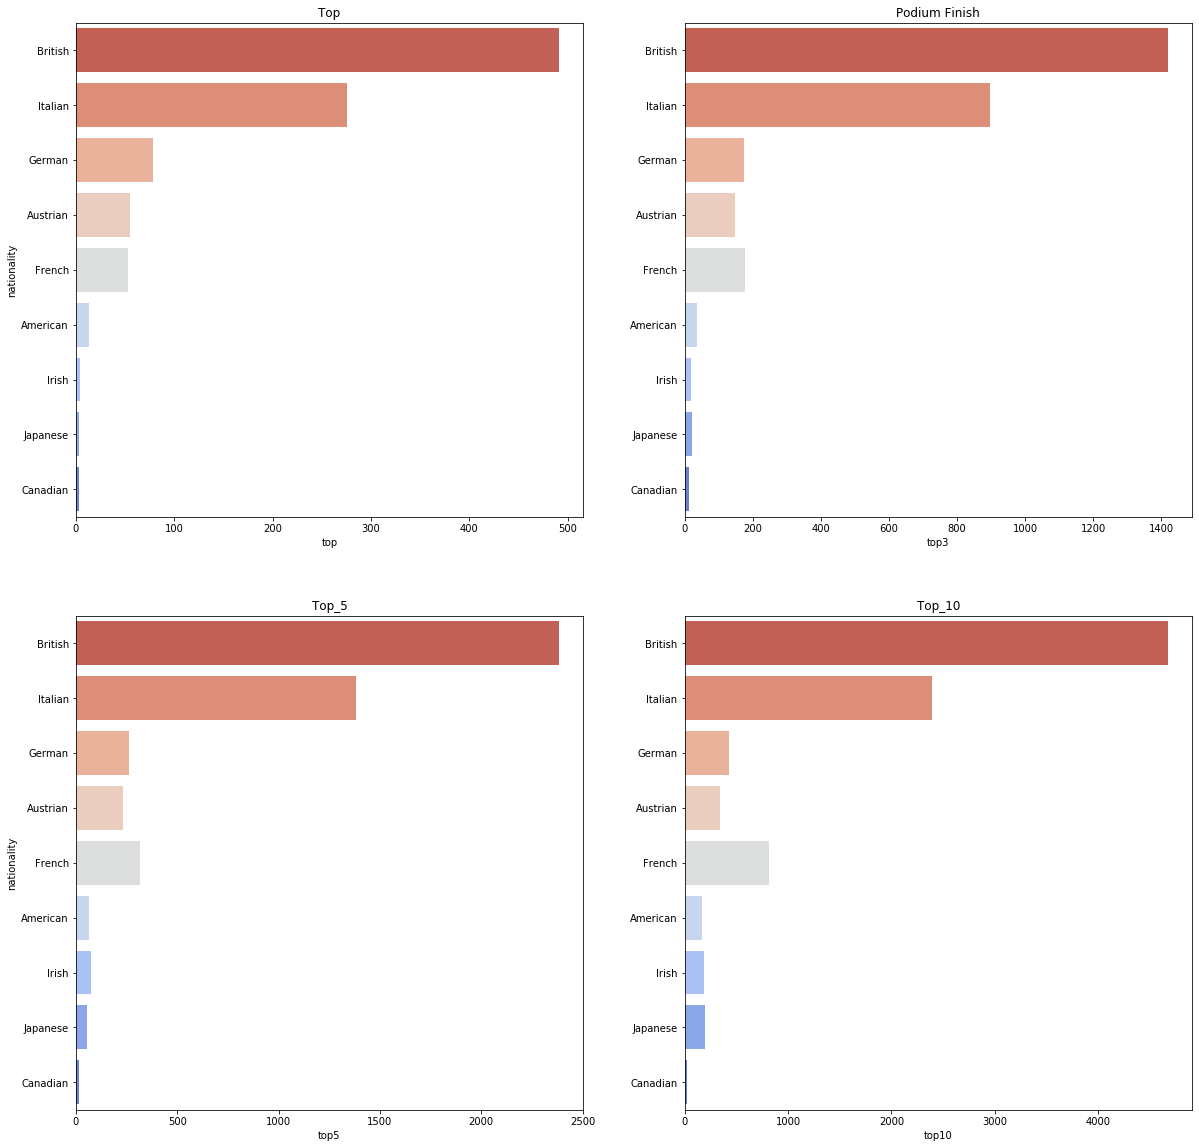

In [84]:
fig = plt.figure(figsize=(20,20))
plt.subplot(221)
_=sns.barplot(x='top', y='nationality', data=nation_df[:30],palette='coolwarm_r').set_title('Top')
plt.subplot(222)
_=sns.barplot(x='top3', y='nationality', data=nation_df[:30],palette='coolwarm_r').set_title("Podium Finish")
_ =ax= plt.gca()
_= ax.set_ylabel('')
plt.subplot(223)
_=sns.barplot(x='top5', y='nationality', data=nation_df[:30],palette='coolwarm_r').set_title("Top_5")
plt.subplot(224)
_=sns.barplot(x='top10',y='nationality', data=nation_df[:30],palette='coolwarm_r').set_title("Top_10")
_ =ax= plt.gca()
_= ax.set_ylabel('')
#plt.savefig('nationality.png', bbox_inches='tight')

In [85]:
top_10['freq'] = top_10.groupby('constructor_name')['constructor_name'].transform('count')

In [86]:
top_5['freq'] = top_5.groupby('constructor_name')['constructor_name'].transform('count')

In [87]:
top_3['freq'] =top_3.groupby('constructor_name')['constructor_name'].transform('count')

In [88]:
top_1['freq'] = top_1.groupby('constructor_name')['constructor_name'].transform('count')

In [89]:
top_10.sort_values(by=['freq'], ascending=False, inplace=True)

In [90]:
top_5.sort_values(by=['freq'], ascending=False, inplace=True)

In [91]:
top_3.sort_values(by=['freq'], ascending=False, inplace=True)

In [92]:
top_1.sort_values(by=['freq'], ascending=False, inplace=True)

In [93]:
freq_10 = top_10.drop_duplicates(subset=['constructor_name'])

In [94]:
freq_5 = top_5.drop_duplicates(subset=['constructor_name'])

In [95]:
freq_3 = top_3.drop_duplicates(subset=['constructor_name'])

In [96]:
freq_1 = top_1.drop_duplicates(subset=['constructor_name'])

In [97]:
freq_10.reset_index(drop=True, inplace=True)

In [98]:
freq_5.reset_index(drop=True, inplace=True)

In [99]:
freq_3.reset_index(drop=True, inplace=True)

In [100]:
freq_1.reset_index(drop=True, inplace=True)

In [101]:
freq_1 = freq_1[['constructor_name', 'freq', 'nationality',  'constructorId']]

In [102]:
freq_3 = freq_3[['constructor_name', 'freq']]

In [103]:
freq_5 = freq_5[['constructor_name', 'freq']]

In [104]:
freq_10 = freq_10[['constructor_name', 'freq']]

In [105]:
final_freq = pd.merge(freq_1, freq_3, how='inner', left_on='constructor_name', right_on='constructor_name')

In [106]:
final_freq = pd.merge(final_freq, freq_5, how='inner', left_on='constructor_name', right_on='constructor_name')

In [107]:
final_freq = pd.merge(final_freq, freq_10, how='inner', left_on='constructor_name', right_on='constructor_name')

In [108]:
final_freq.columns = ['constructor_name', 'top_position', 'nationality', 'constructorId', 'top3_finish', 'top5_finish', 'top10_finish']

In [109]:
final_freq = final_freq[['constructor_name', 'constructorId', 'nationality', 'top_position', 'top3_finish', 'top5_finish', 'top10_finish']]

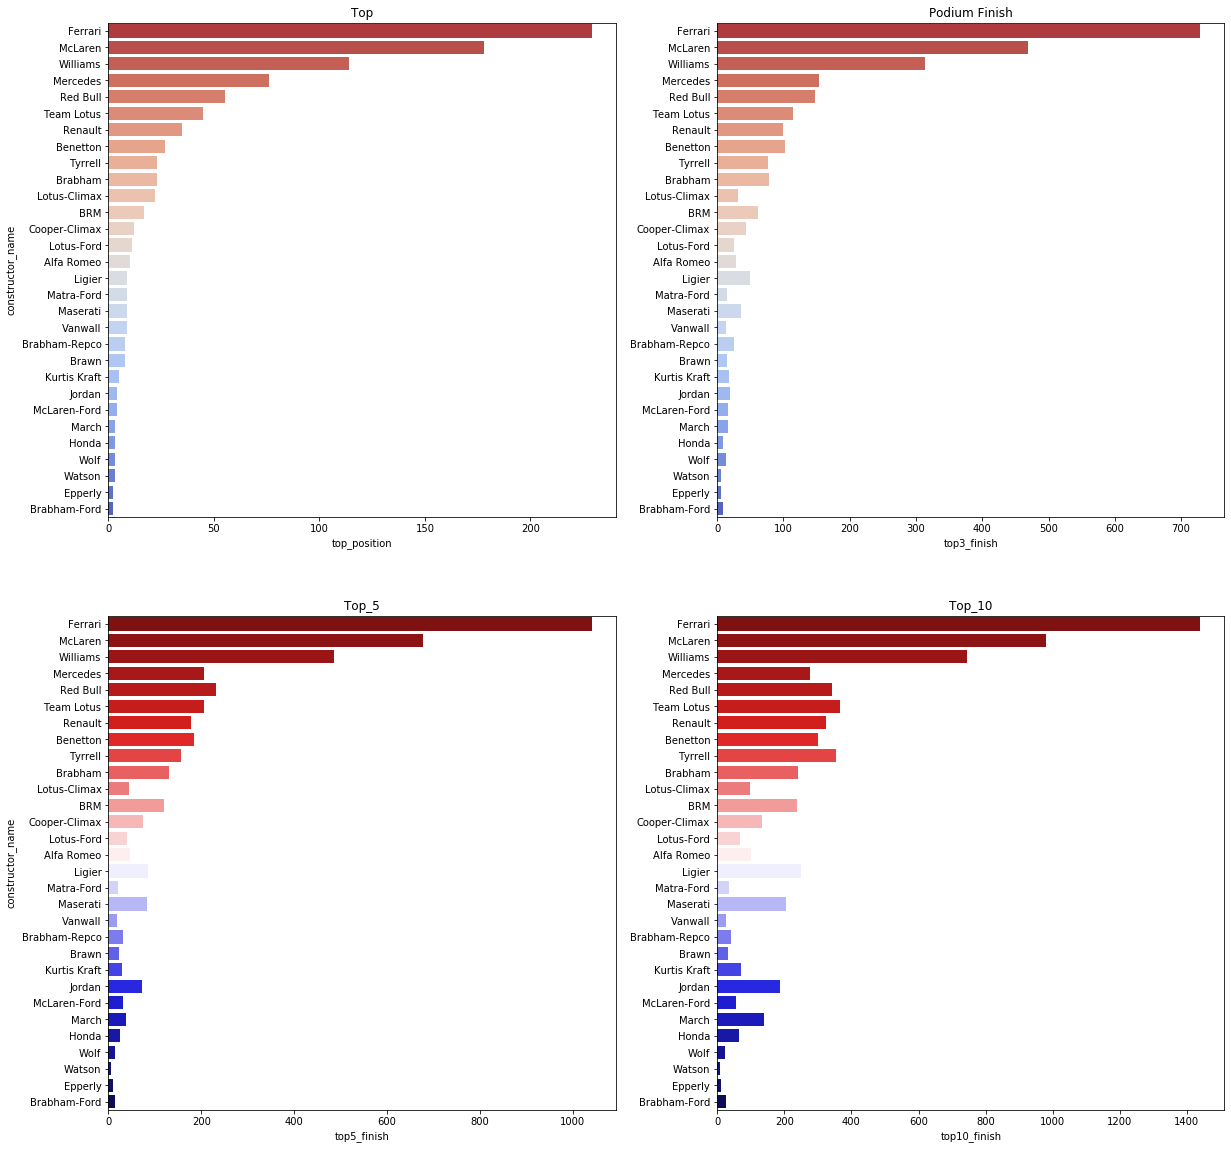

In [144]:
fig = plt.figure(figsize=(20,20))
plt.subplot(221)
_=sns.barplot(x='top_position', y='constructor_name', data=final_freq[:30],palette='coolwarm_r').set_title('Top')
plt.subplot(222)
_=sns.barplot(x='top3_finish', y='constructor_name', data=final_freq[:30],palette='coolwarm_r').set_title("Podium Finish")
_ =ax= plt.gca()
_= ax.set_ylabel('')
plt.subplot(223)
_=sns.barplot(x='top5_finish', y='constructor_name', data=final_freq[:30],palette='seismic_r').set_title("Top_5")
plt.subplot(224)
_=sns.barplot(x='top10_finish',y='constructor_name', data=final_freq[:30],palette='seismic_r').set_title("Top_10")
_ =ax= plt.gca()
_= ax.set_ylabel('')
plt.savefig('Constructors.png', bbox_inches='tight')

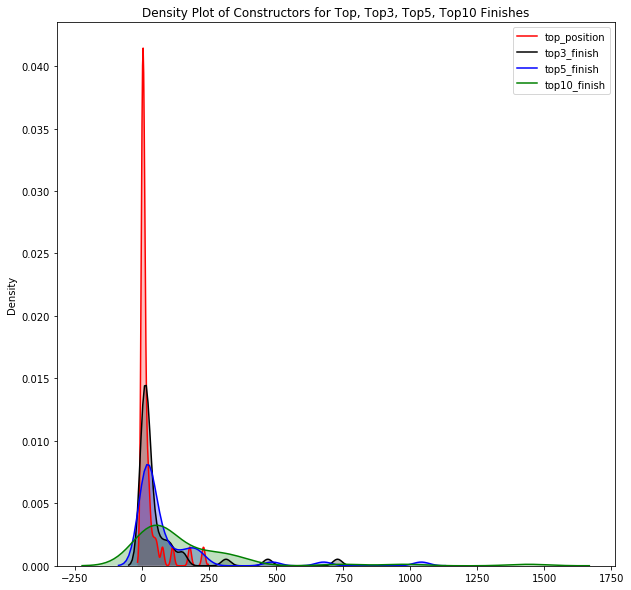

In [145]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.kdeplot(final_freq['top_position'], 
               color='red',
               shade=True)
ax=sns.kdeplot(final_freq['top3_finish'], 
               color='black',
               shade=True)
ax=sns.kdeplot(final_freq['top5_finish'], 
               color='blue',
               shade=True)
ax=sns.kdeplot(final_freq['top10_finish'], 
               color='green',
               shade=True)
ax.set_ylabel('Density')
ax.set_title('Density Plot of Constructors for Top, Top3, Top5, Top10 Finishes')
plt.savefig('density_cons.png', bbox_inches='tight')

In [112]:
temp_df2

,raceId,driverId,constructorId,positionOrder,points,laps,milliseconds,fastestLapSpeed,statusId,year,round,race_name,status,constructorRef,constructor_name,nationality
0,1,18,23,1,10.0,58,5655784.0,216.891006,1,2009,1,Australian Grand Prix,Finished,brawn,Brawn,British
1,1,22,23,2,8.0,58,5656591.0,214.343994,1,2009,1,Australian Grand Prix,Finished,brawn,Brawn,British
2,1,15,7,3,6.0,58,5657388.0,214.705994,1,2009,1,Australian Grand Prix,Finished,toyota,Toyota,Japanese
3,1,10,7,4,5.0,58,5660219.0,215.919998,1,2009,1,Australian Grand Prix,Finished,toyota,Toyota,Japanese
4,1,4,4,5,4.0,58,5660663.0,215.199005,1,2009,1,Australian Grand Prix,Finished,renault,Renault,French
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23483,988,842,5,16,0.0,54,NaN,192.542007,11,2017,20,Abu Dhabi Grand Prix,+1 Lap,toro_rosso,Toro Rosso,Italian
23484,988,828,15,17,0.0,54,NaN,193.057007,11,2017,20,Abu Dhabi Grand Prix,+1 Lap,sauber,Sauber,Swiss
23485,988,840,3,18,0.0,54,NaN,195.401993,11,2017,20,Abu Dhabi Grand Prix,+1 Lap,williams,Williams,British
23486,988,832,4,19,0.0,31,NaN,193.410004,36,2017,20,Abu Dhabi Grand Prix,Wheel,renault,Renault,French


In [113]:
driver_10=temp_df2.groupby('raceId').head(10).reset_index(drop=True)

In [114]:
#driver_10=temp_df2.groupby('raceId').head(10).reset_index(drop=True)

In [115]:
i=[1,3,5,10]
a=[]
for h in i:
    df = temp_df2.groupby('raceId').head(h).reset_index(drop=True)
    df['freq'] = df.groupby('driverId')['driverId'].transform('count')
    df.sort_values(by=['freq'], ascending=False, inplace=True)
    df = df.drop_duplicates(subset=['driverId'])
    df.reset_index(drop=True, inplace=True)
    df = df[['freq','driverId']]
    a.append(df)

In [116]:
df1,df3,df5,df10 = a[0], a[1], a[2], a[3]

In [117]:
driver_name = driver_standing_merged.drop_duplicates(subset=['driverId'])

In [118]:
driver_name = driver_name[['driverId', 'driverRef','forename', 'surname', 'nationality' ]]

In [119]:
driver_df = pd.merge(df1, driver_name, how='inner', left_on='driverId', right_on='driverId')

In [120]:
driver_df = pd.merge(driver_df, df3, how='inner', left_on='driverId', right_on='driverId')

In [121]:
driver_df = pd.merge(driver_df, df5, how='inner', left_on='driverId', right_on='driverId')
driver_df = pd.merge(driver_df, df10, how='inner', left_on='driverId', right_on='driverId')

In [122]:
driver_df.columns = ['top', 'driverId', 'driverRef', 'forename', 'surname', 'nationality', 'top3', 'top5', 'top10']

In [123]:
driver_df = driver_df[['driverId', 'driverRef', 'forename', 'surname', 'nationality','top', 'top3', 'top5', 'top10']]

# 

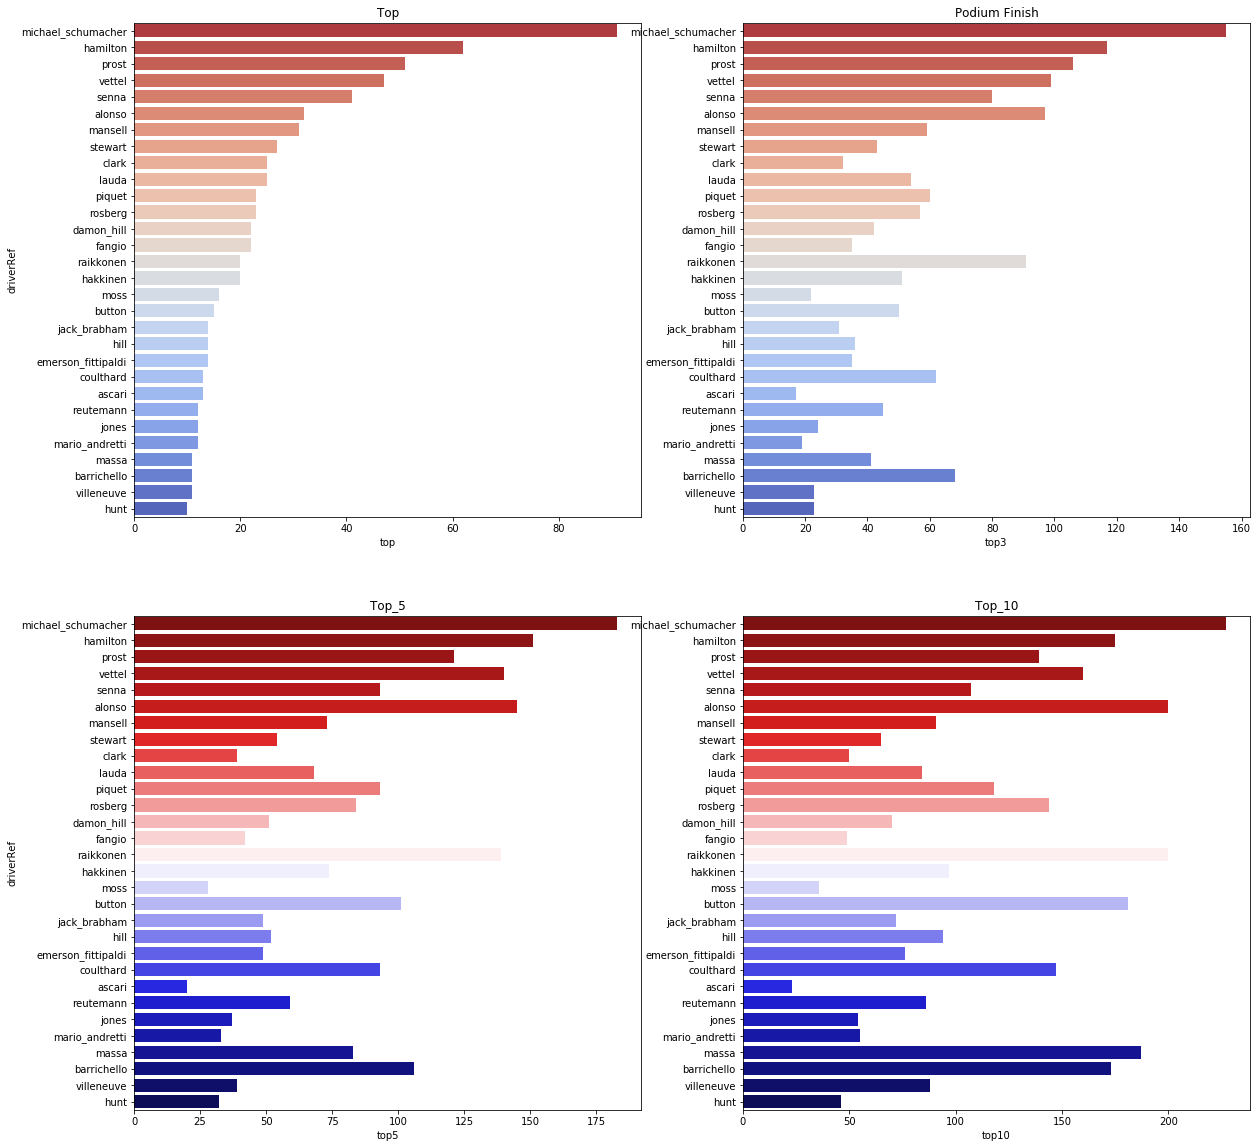

In [143]:
fig = plt.figure(figsize=(20,20))
plt.subplot(221)
_=sns.barplot(x='top', y='driverRef', data=driver_df[:30],palette='coolwarm_r').set_title('Top')
plt.subplot(222)
_=sns.barplot(x='top3', y='driverRef', data=driver_df[:30],palette='coolwarm_r').set_title("Podium Finish")
_ =ax= plt.gca()
_= ax.set_ylabel('')
plt.subplot(223)
_=sns.barplot(x='top5', y='driverRef', data=driver_df[:30],palette='seismic_r').set_title("Top_5")
plt.subplot(224)
_=sns.barplot(x='top10',y='driverRef', data=driver_df[:30],palette='seismic_r').set_title("Top_10")
_ =ax= plt.gca()
_= ax.set_ylabel('')
plt.savefig('ds.png', bbox_inches='tight')

Text(0.5, 1.0, 'Density Plot of Drivers for Top, Top3, Top5, Top10 Finishes')

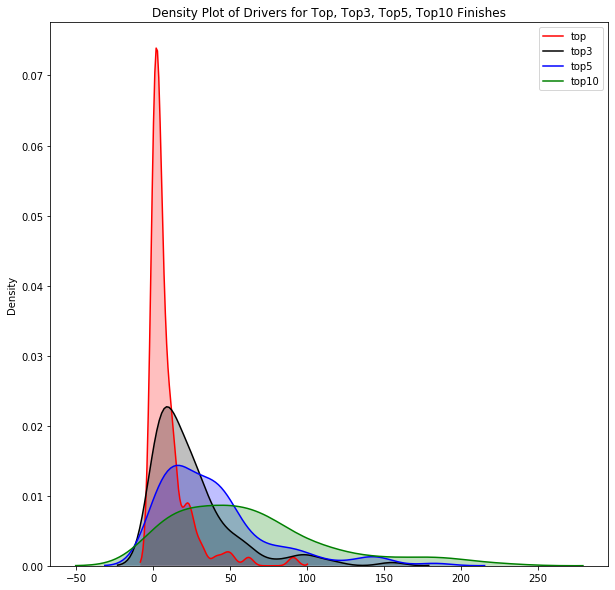

In [125]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.kdeplot(driver_df['top'], 
               color='red',
               shade=True)
ax=sns.kdeplot(driver_df['top3'], 
               color='black',
               shade=True)
ax=sns.kdeplot(driver_df['top5'], 
               color='blue',
               shade=True)
ax=sns.kdeplot(driver_df['top10'], 
               color='green',
               shade=True)
ax.set_ylabel('Density')
ax.set_title('Density Plot of Drivers for Top, Top3, Top5, Top10 Finishes')
#plt.savefig('density_driver.png', bbox_inches='tight')

In [140]:
import plotly.graph_objects as go
import chart_studio.plotly as py
#pyo.init_notebook_mode()
fig=go.Figure(go.bar(driver_df[:30],x='top', y='driverRef'))
py.iplot(fig, filename='jupyter-basic_bar')

TypeError: 'module' object is not callable